Background: Four stock price (Apple, Google, Microsoft, Netflix) between Feb 2023 and May 2023

Objective: To identify the stability and performance based the closing price

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stocks_data = pd.read_csv('stocks.csv')
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [3]:
stocks_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%Y-%m-%d')
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [5]:
print(stocks_data.groupby('Ticker')['Close'].describe())

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


In [6]:
'''fig = go.Figure()
for s in stocks_data['Ticker'].unique():
    sub = stocks_data[stocks_data['Ticker'] == s]
    fig.add_trace(go.Scatter(x=sub['Date'],
                             y=sub['Close'],
                             mode='lines',
                             name=s))

fig.update_layout(title='Time Series of Closing Prices',
                  xaxis_title='Date',
                  yaxis_title='Closing Price')
fig.show()'''

"fig = go.Figure()\nfor s in stocks_data['Ticker'].unique():\n    sub = stocks_data[stocks_data['Ticker'] == s]\n    fig.add_trace(go.Scatter(x=sub['Date'],\n                             y=sub['Close'],\n                             mode='lines',\n                             name=s))\n\nfig.update_layout(title='Time Series of Closing Prices',\n                  xaxis_title='Date',\n                  yaxis_title='Closing Price')\nfig.show()"

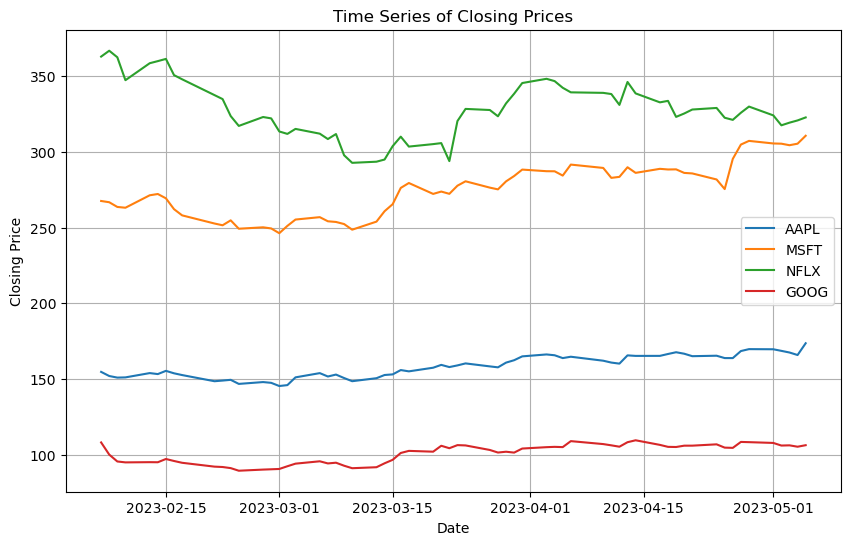

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
for s in stocks_data['Ticker'].unique():
    sub = stocks_data[stocks_data['Ticker'] == s]
    plt.plot(sub['Date'], 
             sub['Close'], 
             label=s,
             linestyle='-')
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
ax.legend()
plt.grid(True)

This time series shows that NFLX (Netflix) has the highest closing value while GOOG (Google) has the lowest closing value.

The chart shows that NFLX (Netflix) has the most volatility against the other three stock and GOOG (Google) has the least fluctuation between February 2023 and May 2023.



In [8]:
'''volatility = pd.pivot_table(stocks_data, index='Ticker', values='Close', aggfunc='std', fill_value=0)
volatility.reset_index(inplace=True)
volatility.columns.name = None
volatility.index.name = None
volatility.sort_values(by='Close', ascending=False, inplace=True)

fig = go.Figure(
    data=[go.Bar(x=volatility['Ticker'],
                 y=volatility['Close'], 
                 marker=dict(line=dict(color='blue', width=1)))])
fig.update_layout(title='Volatility of Closing Prices (Standard Deviation)',
                  xaxis_title='Ticker',
                  yaxis_title='Closing Price Standard Deviation')
fig.update_xaxes(tickangle=45)
fig.show()'''

"volatility = pd.pivot_table(stocks_data, index='Ticker', values='Close', aggfunc='std', fill_value=0)\nvolatility.reset_index(inplace=True)\nvolatility.columns.name = None\nvolatility.index.name = None\nvolatility.sort_values(by='Close', ascending=False, inplace=True)\n\nfig = go.Figure(\n    data=[go.Bar(x=volatility['Ticker'],\n                 y=volatility['Close'], \n                 marker=dict(line=dict(color='blue', width=1)))])\nfig.update_layout(title='Volatility of Closing Prices (Standard Deviation)',\n                  xaxis_title='Ticker',\n                  yaxis_title='Closing Price Standard Deviation')\nfig.update_xaxes(tickangle=45)\nfig.show()"

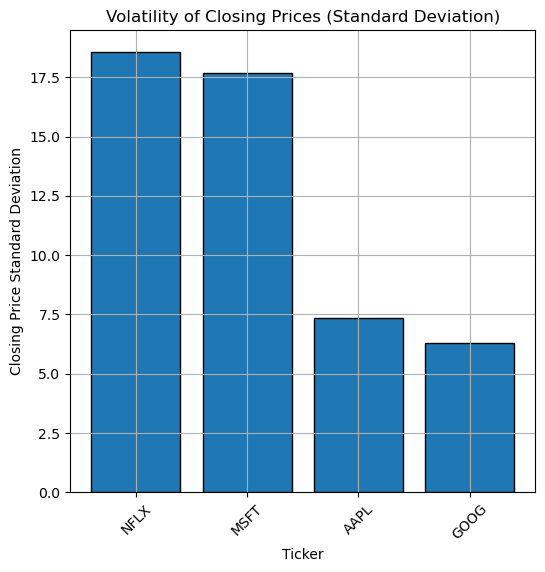

In [9]:
volatility = pd.pivot_table(stocks_data, index='Ticker', values='Close', aggfunc='std', fill_value=0)
volatility.reset_index(inplace=True)
volatility.columns.name = None
volatility.index.name = None
volatility.sort_values(by='Close', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(volatility['Ticker'], 
       volatility['Close'], 
       edgecolor='black')
ax.set_xlabel('Ticker')
ax.set_ylabel('Closing Price Standard Deviation')
ax.set_title('Volatility of Closing Prices (Standard Deviation)')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

Among these four stocks, NFLX (Netflix) has the highest average closing value, and it has the most significant price fluctuation over a period of 62 business days as it has the highest standard deviation.

While GOOG (Google) has the lowest average closing price, and it is the most consistent stock as it has the lowest standard deviation.

In [10]:
'''corr = stocks_data.pivot(index='Date', columns='Ticker', values='Close')
corr = corr.corr()
fig = go.Figure(data=go.Heatmap(z=corr.values,
                                x=corr.columns,
                                y=corr.columns,
                                colorscale='RdBu_r',
                                zmin=0,
                                zmax=1,
                                text=corr.round(2).values, 
                                texttemplate='%{text}', 
                                textfont={'size': 12})) 
fig.update_layout(title='Correlation Matrix of Closing Prices',
                  xaxis_title='Ticker',
                  yaxis_title='Ticker')
fig.show()'''

"corr = stocks_data.pivot(index='Date', columns='Ticker', values='Close')\ncorr = corr.corr()\nfig = go.Figure(data=go.Heatmap(z=corr.values,\n                                x=corr.columns,\n                                y=corr.columns,\n                                colorscale='RdBu_r',\n                                zmin=0,\n                                zmax=1,\n                                text=corr.round(2).values, \n                                texttemplate='%{text}', \n                                textfont={'size': 12})) \nfig.update_layout(title='Correlation Matrix of Closing Prices',\n                  xaxis_title='Ticker',\n                  yaxis_title='Ticker')\nfig.show()"

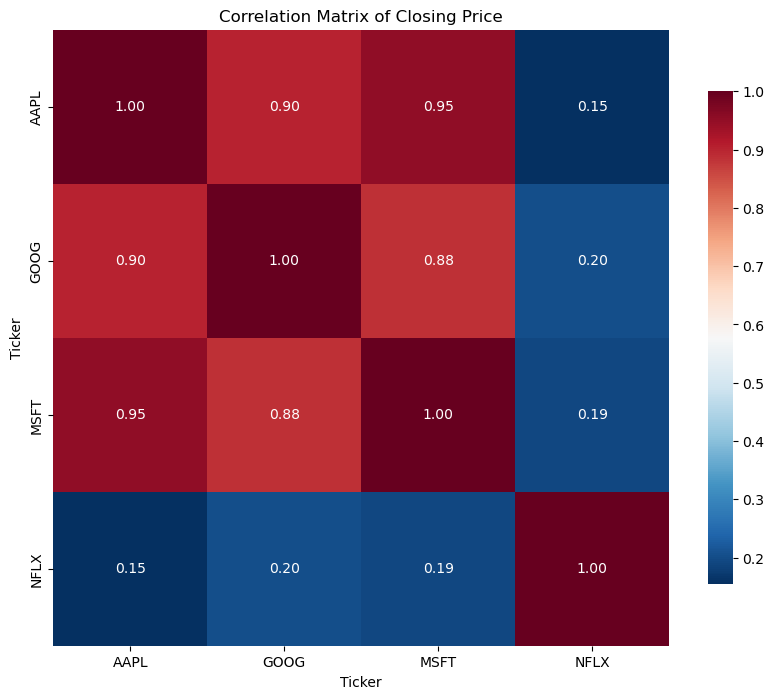

In [11]:
corr = stocks_data.pivot(index='Date', columns='Ticker', values='Close')
corr = corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            square=True, 
            cbar_kws={'shrink': 0.8})  
plt.title('Correlation Matrix of Closing Price')
plt.show()

A strong positive correlation between Apple (AAPL), Google (GOOG) and Microsoft (MSFT) suggests that when Apple or Google or Microsoft rises, the other two stocks tend to rise very strongly.

In [12]:
'''percentage_change = stocks_data.sort_values(by='Date')
percentage_change = percentage_change.pivot(index='Date', columns='Ticker', values='Close')
percentage_change = ((percentage_change.iloc[-1] - percentage_change.iloc[0]) / percentage_change.iloc[0]) * 100

fig = go.Figure(data=[go.Bar(x=percentage_change.index,
                             y=percentage_change.values)])

fig.update_layout(title='Percentage Change in Closing Prices',
                  xaxis_title='Ticker',
                  yaxis_title='Percentage Change (%)')

fig.show()'''

"percentage_change = stocks_data.sort_values(by='Date')\npercentage_change = percentage_change.pivot(index='Date', columns='Ticker', values='Close')\npercentage_change = ((percentage_change.iloc[-1] - percentage_change.iloc[0]) / percentage_change.iloc[0]) * 100\n\nfig = go.Figure(data=[go.Bar(x=percentage_change.index,\n                             y=percentage_change.values)])\n\nfig.update_layout(title='Percentage Change in Closing Prices',\n                  xaxis_title='Ticker',\n                  yaxis_title='Percentage Change (%)')\n\nfig.show()"

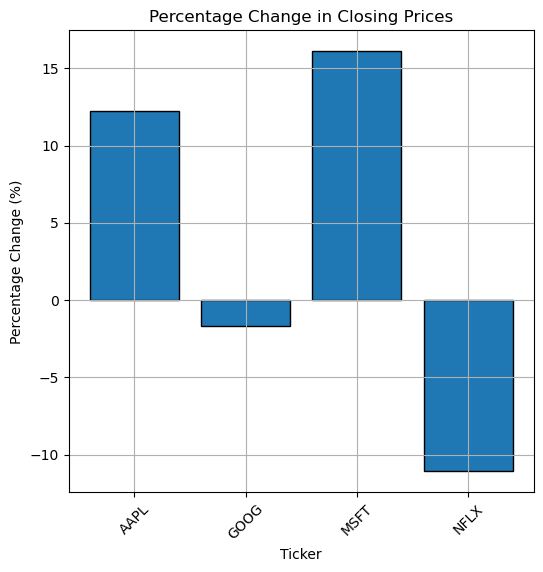

In [13]:
percentage_change = stocks_data.sort_values(by='Date')
percentage_change = percentage_change.pivot(index='Date', columns='Ticker', values='Close')
percentage_change = ((percentage_change.iloc[-1] - percentage_change.iloc[0]) / percentage_change.iloc[0]) * 100

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(percentage_change.index, 
       percentage_change.values, 
       edgecolor='black') 
ax.set_xlabel('Ticker')
ax.set_ylabel('Percentage Change (%)')
ax.set_title('Percentage Change in Closing Prices')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

Based on the above bar chart, MSFT (Microsoft) has the highest gain, while NFLX (Netflix) has the biggest lost when compared to the closing price two months before. The percentage change chart clearly shows that MSFT was the best-performing stock, and NFLX was the worst-performing stock, in terms of total return over the observed period.

In [14]:
daily_returns = stocks_data.pivot(index='Date', columns='Ticker', values='Close')
daily_returns = daily_returns.pct_change().dropna()
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2023-02-08 to 2023-05-05
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    61 non-null     float64
 1   GOOG    61 non-null     float64
 2   MSFT    61 non-null     float64
 3   NFLX    61 non-null     float64
dtypes: float64(4)
memory usage: 2.4 KB


In [15]:
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})
risk_return_df

,Risk,Average Daily Return
Ticker,,
AAPL,0.014152,0.001991
GOOG,0.020710,-0.000067
MSFT,0.017881,0.002606
NFLX,0.022481,-0.001676


In [16]:
'''fig = go.Figure(data=[go.Scatter(x=risk_return_df['Risk'],
                                 y=risk_return_df['Average Daily Return'],
                                 mode='markers+text',
                                 marker=dict(size=8), 
                                 text=risk_return_df.index,
                                 textposition='top center')])
fig.update_layout(title='Risk vs. Return Analysis',
                  xaxis_title='Risk (Standard Deviation)',
                  yaxis_title='Average Daily Return')
fig.show()'''

"fig = go.Figure(data=[go.Scatter(x=risk_return_df['Risk'],\n                                 y=risk_return_df['Average Daily Return'],\n                                 mode='markers+text',\n                                 marker=dict(size=8), \n                                 text=risk_return_df.index,\n                                 textposition='top center')])\nfig.update_layout(title='Risk vs. Return Analysis',\n                  xaxis_title='Risk (Standard Deviation)',\n                  yaxis_title='Average Daily Return')\nfig.show()"

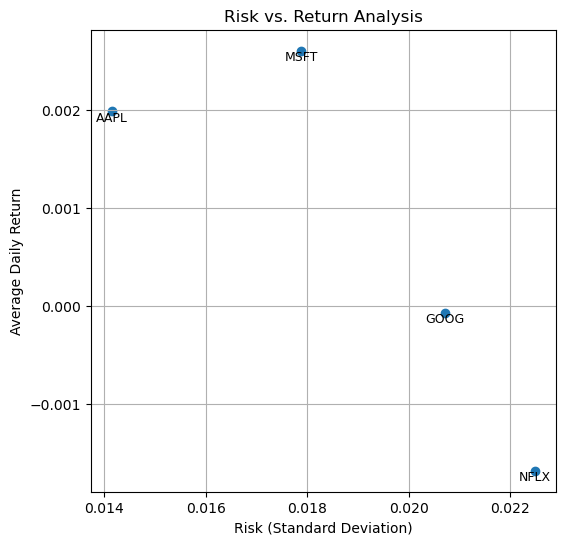

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(risk_return_df['Risk'], 
           risk_return_df['Average Daily Return'], 
           marker='o') 
for i in range(len(risk_return_df)):
    ax.text(risk_return_df['Risk'].iloc[i], 
            risk_return_df['Average Daily Return'].iloc[i], 
            risk_return_df.index[i], 
            fontsize=9, 
            ha='center', 
            va='top')
ax.set_xlabel('Risk (Standard Deviation)')
ax.set_ylabel('Average Daily Return')
ax.set_title('Risk vs. Return Analysis')
plt.grid(True)
plt.show()

Based on the average daily return and the violabily over the period, NFLX (Netflix) has the highest risk and biggest lost. While MSFT (Microsoft) has the moderate risk with highest gain and AAPL (Apple) has the lowest risk and second highest gain.

Key Findings:
1. There is a very strong positive correlation between Apple (AAPL), Google (GOOG) and Microsoft (MSFT).
2. AAPL (Apple) is the best choice based on the principle of achieving a good return for the least amount of risk. It provided the second-highest return (0.002) with the lowest risk (0.014). This demonstrates a superior risk-adjusted return.

Reference: https://amanxai.com/2024/01/15/quantitative-analysis-of-stock-market-using-python/